# Reproducing Fig. 2

In [1]:
from enum import unique
import importlib
import xgi
import matplotlib.pyplot as plt
import random
import numpy as np
import itertools
from HONG import *
import HONG
importlib.reload(HONG)
import csv
from tqdm import tqdm
import csv
from numpy import genfromtxt
import matplotlib as mpl

mpl.style.use('report_style.mplstyle')

Parameters of the experiment

In [10]:
prop_committed = 0.03
beta_non_committed = 0.2759
beta_committed = 0.2759
ensemble_size = 20
run_length = 10**5
social_structures = ['InVS15', 'LyonSchool', 'SFHH', 'Thiers13']

Run the ensemble experiments

In [11]:
for i in social_structures[:]:
    run_ensemble_experiment(prop_committed, beta_non_committed, beta_committed, ensemble_size, run_length, i)

100%|██████████| 20/20 [01:53<00:00,  5.65s/it]


# Plotting

Plot results for ensemble experiment on linear time axis

loaded data


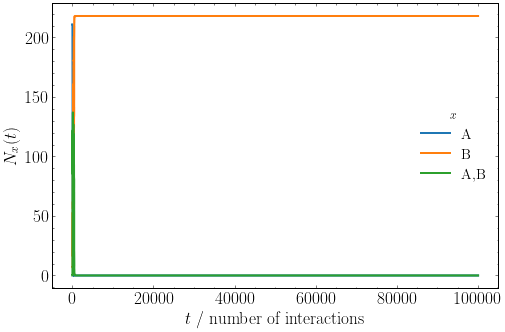

In [5]:
social_structure = 'LyonSchool'

fname = f'{social_structure}_{prop_committed}_{beta_non_committed}_{beta_committed}_{run_length}_{ensemble_size}'

data = genfromtxt(f'outputs/{fname}.csv', delimiter=',')

print('loaded data')

A_data = data[0::3,:]
B_data = data[1::3,:]
AB_data = data[2::3,:]

A_data_av = np.median(A_data, axis=0)
A_data_25 = np.percentile(A_data, 25, axis=0)
A_data_75 = np.percentile(A_data, 75, axis=0)
B_data_av = np.median(B_data, axis=0)
B_data_25 = np.percentile(B_data, 25, axis=0)
B_data_75 = np.percentile(B_data, 75, axis=0)
AB_data_av = np.median(AB_data, axis=0)
AB_data_25 = np.percentile(AB_data, 25, axis=0)
AB_data_75 = np.percentile(AB_data, 75, axis=0)

t = np.linspace(0, run_length, num=run_length+1, endpoint=True)

plt.figure(1)
plt.plot(t, A_data_av, color='tab:blue', label='A')
plt.fill_between(t, y1=A_data_25, y2=A_data_75, color='tab:blue', alpha=0.2)
plt.plot(t, B_data_av, color='tab:orange', label='B')
plt.fill_between(t, y1=B_data_25, y2=B_data_75, color='tab:orange', alpha=0.2)
plt.plot(t, AB_data_av, color='tab:green', label='Mixed')
plt.fill_between(t, y1=AB_data_25, y2=AB_data_75, color='tab:green', alpha=0.2)
plt.legend(title=social_structure)
plt.xlabel(r'$t$ / number of interactions')
plt.ylabel(r'$N_{x}(t)$')
plt.legend(title=r'$x$')
plt.savefig(f'figures/{fname}_lintime.pdf')
plt.show()

Produces multiple logarithmic plots of individual ensemble experiments

loaded data


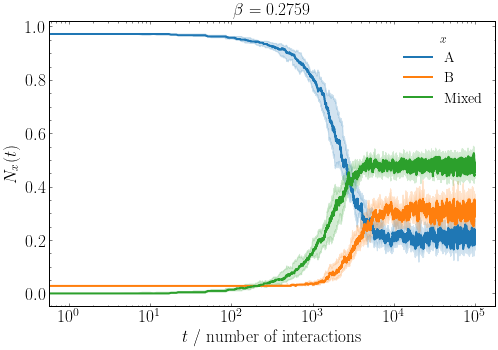

loaded data


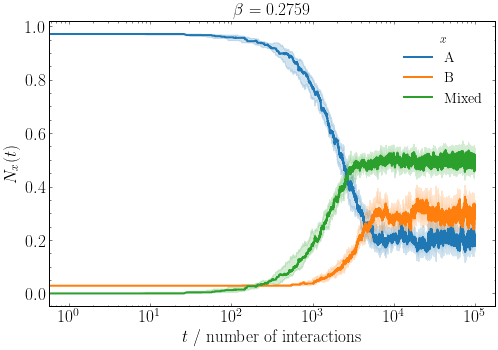

loaded data


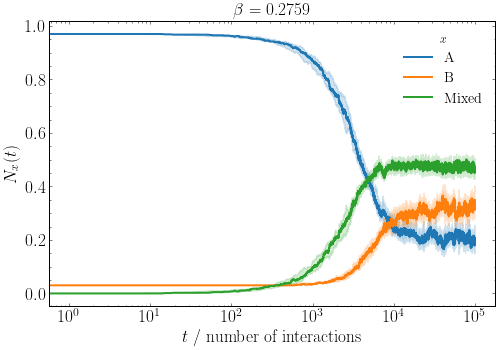

loaded data


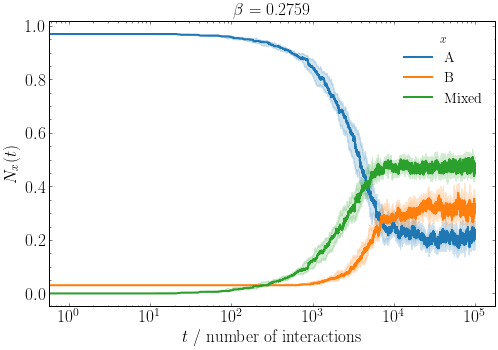

In [12]:
social_structures = {'InVS15':0, 'LyonSchool':0, 'SFHH':0, 'Thiers13':0}

for social_structure in list(social_structures.keys())[:]:
    fname = f'{social_structure}_{prop_committed}_{beta_non_committed}_{beta_committed}_{run_length}_{ensemble_size}'

    data = genfromtxt(f'outputs/{fname}.csv', delimiter=',')

    print('loaded data')

    A_data = data[0::3,:]
    B_data = data[1::3,:]
    AB_data = data[2::3,:]

    N = A_data[0,0]+B_data[0,0]+AB_data[0,0]

    A_data = A_data/N
    B_data = B_data/N
    AB_data = AB_data/N

    A_data_av = np.median(A_data, axis=0)
    A_data_25 = np.percentile(A_data, 25, axis=0)
    A_data_75 = np.percentile(A_data, 75, axis=0)
    B_data_av = np.median(B_data, axis=0)
    B_data_25 = np.percentile(B_data, 25, axis=0)
    B_data_75 = np.percentile(B_data, 75, axis=0)
    AB_data_av = np.median(AB_data, axis=0)
    AB_data_25 = np.percentile(AB_data, 25, axis=0)
    AB_data_75 = np.percentile(AB_data, 75, axis=0)

    t = np.linspace(0, run_length, num=run_length+1, endpoint=True)

    plt.figure()
    plt.plot(t, A_data_av, color='tab:blue', label='A')
    plt.fill_between(t, y1=A_data_25, y2=A_data_75, color='tab:blue', alpha=0.2)
    plt.plot(t, B_data_av, color='tab:orange', label='B')
    plt.fill_between(t, y1=B_data_25, y2=B_data_75, color='tab:orange', alpha=0.2)
    plt.plot(t, AB_data_av, color='tab:green', label='Mixed')
    plt.fill_between(t, y1=AB_data_25, y2=AB_data_75, color='tab:green', alpha=0.2)
    plt.xscale('log')
    plt.title(r'$\beta$' + f' = {beta_non_committed}')
    plt.xlabel('$t$ / number of interactions')
    plt.ylabel(r'$N_{x}(t)$')
    plt.legend(title=r'$x$')
    plt.savefig(f'figures/{fname}_logtime.pdf')
    plt.show()

Full reproduction of plots

loaded data
loaded data
loaded data
loaded data


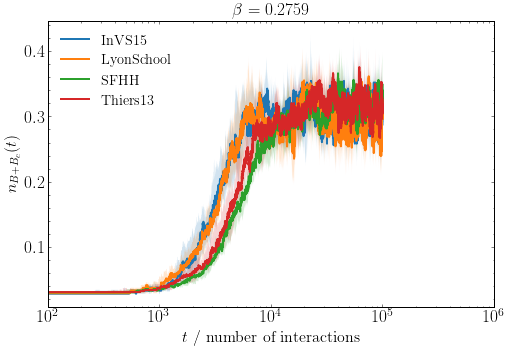

loaded data
loaded data
loaded data
loaded data


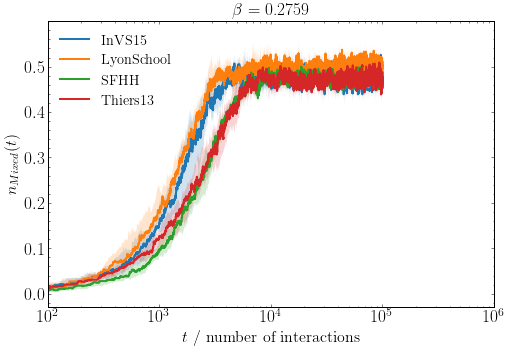

In [13]:
social_structures = {'InVS15':0, 'LyonSchool':0, 'SFHH':0, 'Thiers13':0}

for social_structure in social_structures:
    fname = f'{social_structure}_{prop_committed}_{beta_non_committed}_{beta_committed}_{run_length}_{ensemble_size}'
    data = genfromtxt(f'outputs/{fname}.csv', delimiter=',')

    print('loaded data')
    A_data = data[0::3,:]
    B_data = data[1::3,:]
    AB_data = data[2::3,:]

    N = A_data[0,0]+B_data[0,0]+AB_data[0,0]

    B_data = B_data/N
    
    B_data_av = np.median(B_data, axis=0)
    B_data_25 = np.percentile(B_data, 25, axis=0)
    B_data_75 = np.percentile(B_data, 75, axis=0)
    t = np.linspace(0, run_length, num=run_length+1, endpoint=True)

    plt.plot(t, B_data_av, label = social_structure)
    plt.fill_between(t, y1=B_data_25, y2=B_data_75, alpha=0.2)

    plt.xlabel('$t$ / number of interactions', fontsize=16)
    plt.ylabel(r'$n_{B+B_c}(t)$', fontsize=16)

fname = f'allstructures_{prop_committed}_{beta_non_committed}_{beta_committed}_{run_length}_{ensemble_size}'
plt.legend()
plt.title(r'$\beta$' + f' = {beta_non_committed}')
plt.xscale('log')
plt.xlim((1e2, 1e6))
plt.savefig(f'figures/{fname}_B_logtime.pdf')
plt.show()


social_structures = {'InVS15':217, 'LyonSchool':218, 'SFHH':255, 'Thiers13':327}

for social_structure in social_structures:
    fname = f'{social_structure}_{prop_committed}_{beta_non_committed}_{beta_committed}_{run_length}_{ensemble_size}'
    N = social_structures[social_structure]
    data = genfromtxt(f'outputs/{fname}.csv', delimiter=',')/N

    print('loaded data')
    A_data = data[0::3,:]
    B_data = data[1::3,:]
    AB_data = data[2::3,:]

    N = A_data[0,0]+B_data[0,0]+AB_data[0,0]

    AB_data = AB_data/N
    
    AB_data_av = np.median(AB_data, axis=0)
    AB_data_25 = np.percentile(AB_data, 25, axis=0)
    AB_data_75 = np.percentile(AB_data, 75, axis=0)
    t = np.linspace(0, run_length, num=run_length+1, endpoint=True)

    plt.plot(t, AB_data_av, label = social_structure)
    plt.fill_between(t, y1=AB_data_25, y2=AB_data_75, alpha=0.2)

    plt.xlabel('$t$ / number of interactions', fontsize=16)
    plt.ylabel(r'$n_{Mixed}(t)$', fontsize=16)

fname = f'allstructures_{prop_committed}_{beta_non_committed}_{beta_committed}_{run_length}_{ensemble_size}'
plt.legend()
plt.xscale('log')
plt.xlim((1e2, 1e6))
plt.title(r'$\beta$' + f' = {beta_non_committed}')
plt.savefig(f'figures/{fname}_AB_logtime.pdf')
plt.show()